In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
data_directory = '../src/flex_op/src/airfoil_polars/'

In [3]:
def plot_polar(alpha_rad, cl, cd, cm, figax=None, lsargs=None, **kwargs):
    if figax is None:
        fig, ax = plt.subplots(ncols=3, **kwargs)
    else:
        fig, ax = figax

    alpha_deg = alpha_rad * 180 / np.pi

    ax[0].plot(alpha_deg, cl, **lsargs)
    ax[1].plot(alpha_deg, cd)
    ax[2].plot(alpha_deg, cm)

    for a in ax:
        a.set_xlabel('Angle of Attack, deg')
    ax[0].set_ylabel('Lift Coefficient, Cl')
    ax[1].set_ylabel('Drag Coefficient, Cd')
    ax[2].set_ylabel('Pitching Moment Coefficient, Cm')
    plt.tight_layout()

    return fig, ax

In [4]:
def load_polar(filename):
    data = np.loadtxt(filename)
    aoa_rad = data[:, 0] * np.pi / 180
    cl = data[:, 1]
    cd = data[:, 2]
    cm = data[:, 3]
    return aoa_rad, cl, cd, cm

def load_deflection(filename):
    data = np.loadtxt(filename)
    aoa = data[:, 0]
    deflection = data[:, 1:]
    return aoa, deflection

In [5]:
polar_data = [
    {'fname': 'xfoil_seq_re1300000_root.txt',
    'name': 'root'},
    {'fname': 'xfoil_seq_re1300000_tip.txt',
    'name': 'tip'},
    {'fname': 'xfoil_seq_re1300000_naca0012.txt',
    'name': 'naca0012'}
]

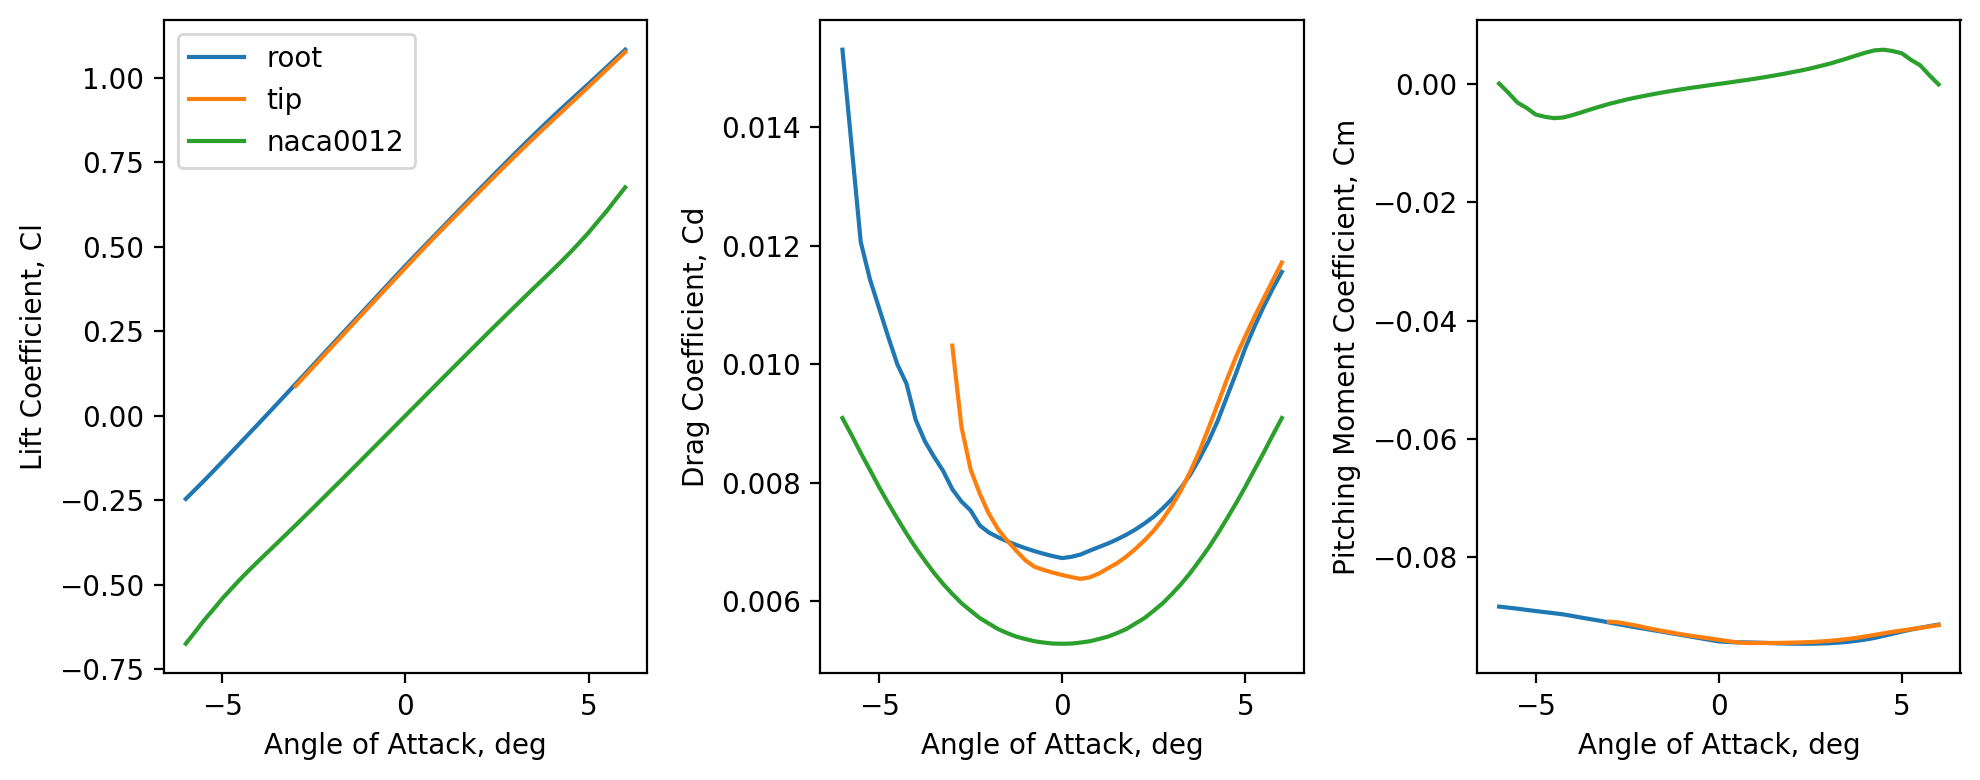

In [6]:
for ith, polar in enumerate(polar_data):
#     fig, ax = plot_polar(*load_polar(data_directory + polar['fname']), figsize=(10, 4))
#     fig.suptitle(polar['name'])
    lsargs = {'label': polar['name']}
    if ith == 0:
        fig, ax = plot_polar(*load_polar(data_directory + polar['fname']), figsize=(10, 4), lsargs=lsargs)
    else:
        fig, ax = plot_polar(*load_polar(data_directory + polar['fname']), figax=(fig, ax), lsargs=lsargs)
ax[0].legend()

# FlexOp Aircraft Polars

## Convergence on polar data - UVLM only

In [7]:
cases = []

cases.append({'filename': 'seq_flexop_w10n1_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'W10n1'}})

cases.append({'filename': 'seq_flexop_w20n1_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 12160 wake panels, N=38, M=8',
             'lsargs': {'label': 'W10n1'}})

cases.append({'filename': 'seq_flexop_w20n4_uinf0450_p0_f0.dat',
              'rmk': 'wake length 20, n_elem = 4, 46080 wake panels, 2304 bound panels, N=144, M=8.',
             'lsargs': {'label':'W20n4'}})

cases.append({'filename': 'seq_flexop_w10n4_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 4, 23040 wake panels, 2304 bound panels, N=144, M=8.',
             'lsargs': {'label':'W10n4'}})

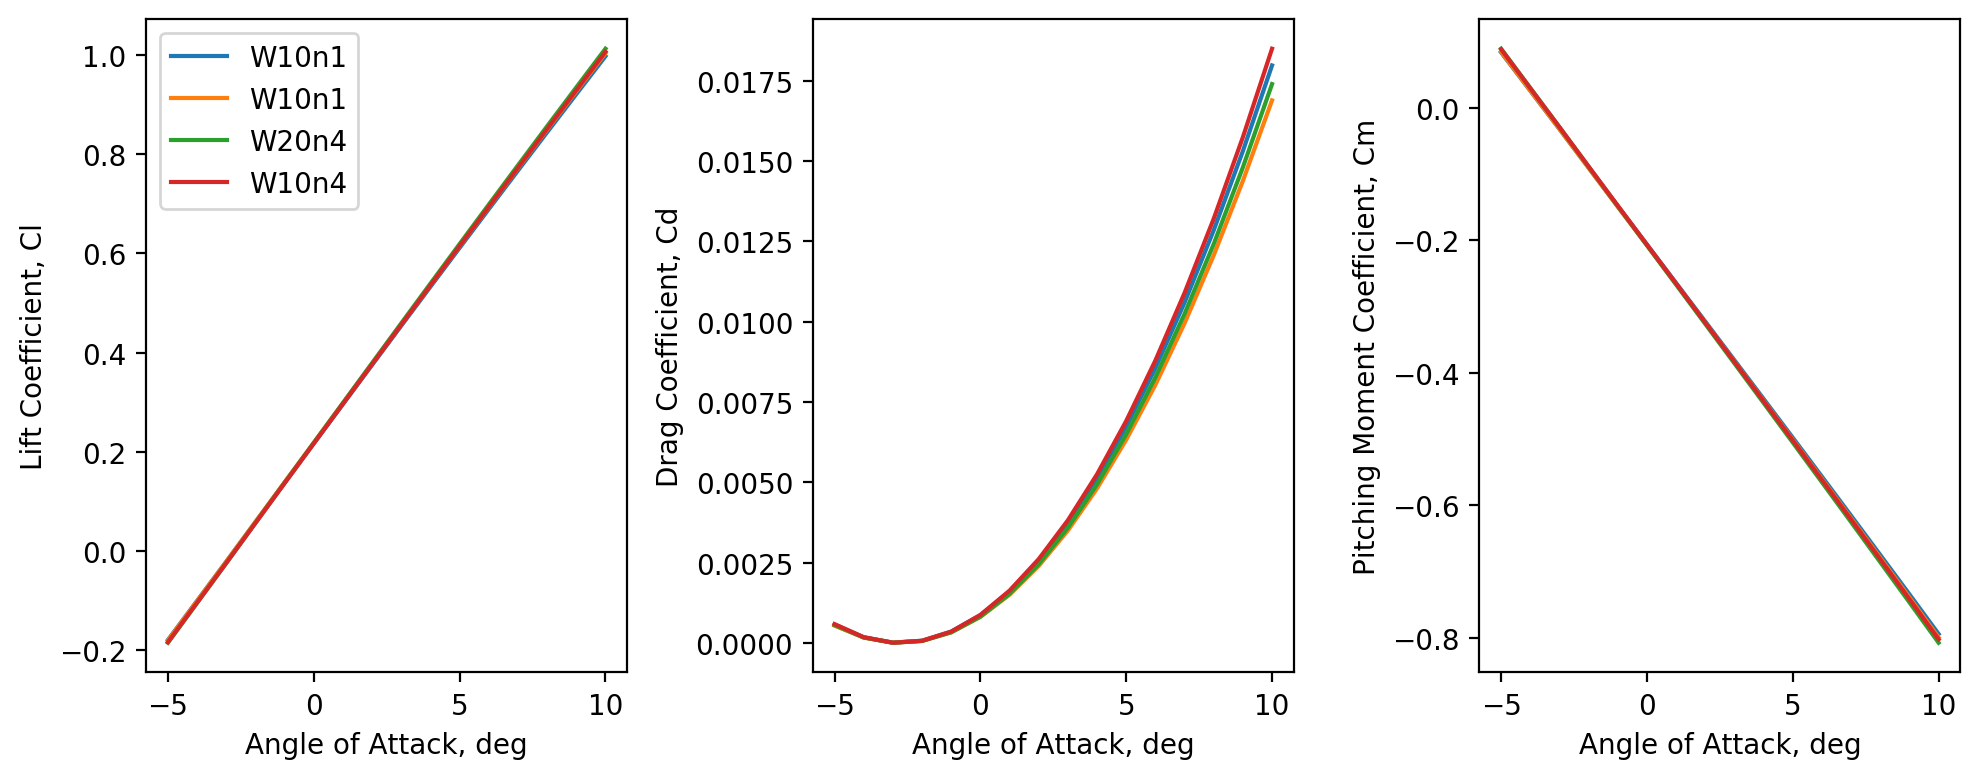

In [8]:
for ith, case in enumerate(cases):
    if ith == 0:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figsize=(10, 4), lsargs=case['lsargs'])
    else:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figax=(fig, ax), lsargs=case['lsargs'])
        
ax[0].legend()

Text(0, 0.5, 'Span-normalised, Out-of-plane deflection, G frame, m')

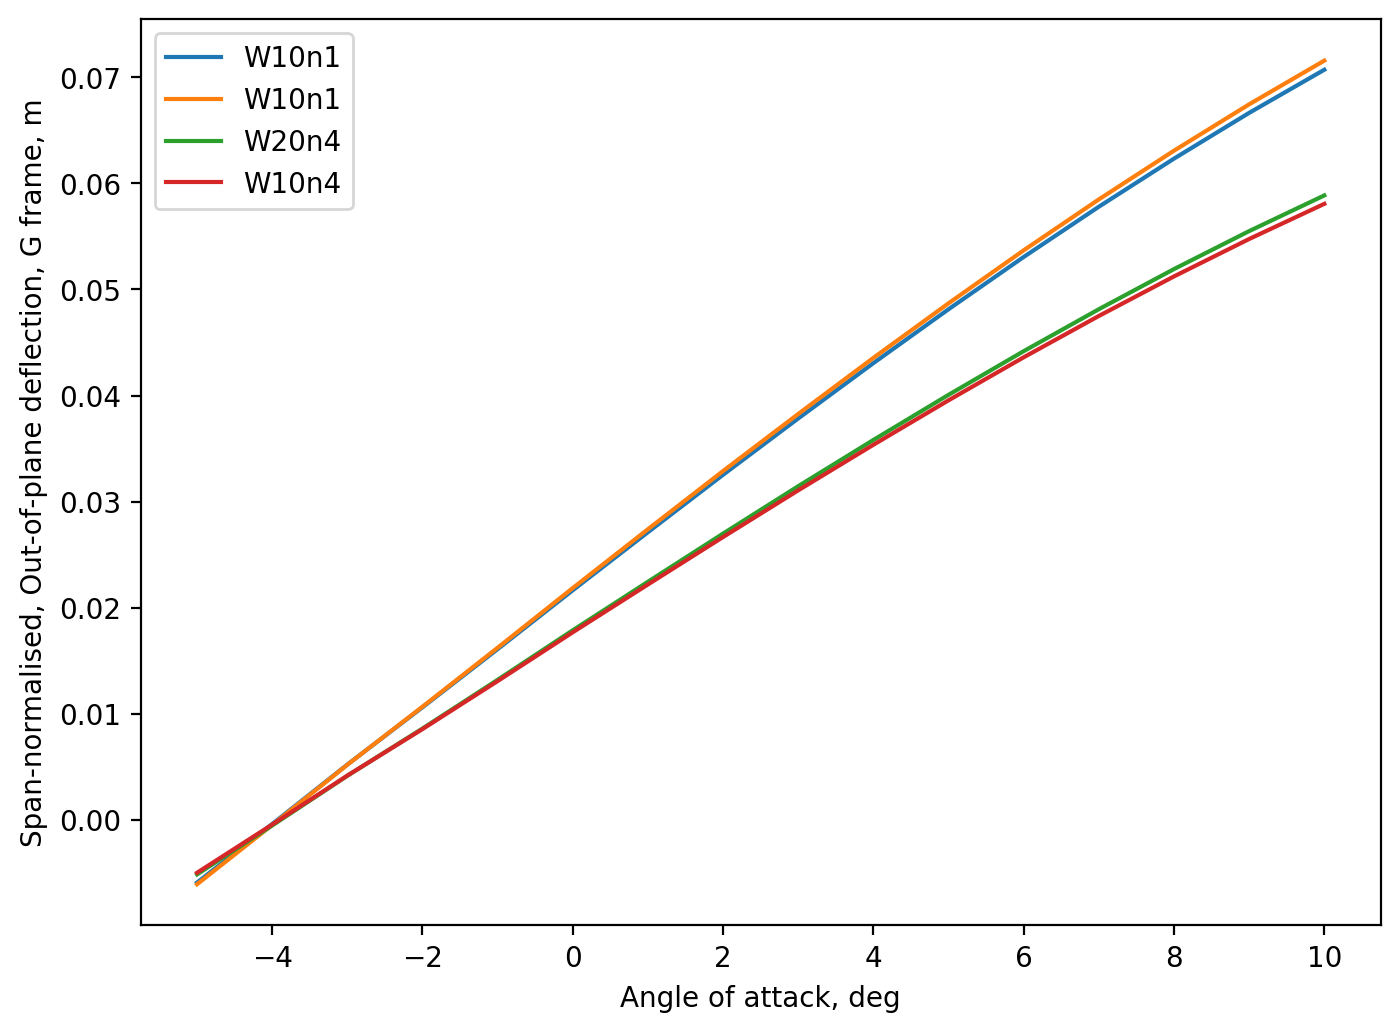

In [9]:
for ith, case in enumerate(cases):
    aoa, deflection = load_deflection('./polar_output_data/' + 'wingtip_deflection_' + case['filename'])
    plt.plot(aoa, deflection[:, -1] / (7.07 / 2), **case['lsargs'])

plt.legend()
plt.xlabel('Angle of attack, deg')
plt.ylabel('Span-normalised, Out-of-plane deflection, G frame, m')

# Polars and UVLM comparison

In [10]:
cases = []

cases.append({'filename': 'seq_flexop_w10n1_uinf0450_p0_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'UVLM'}})

cases.append({'filename': 'seq_flexop_w10n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'Polars'}})

cases.append({'filename': 'seq_flexop_rigid_w10n1_uinf0450_p1_f0.dat',
              'rmk': 'wake length 10, n_elem = 1, 608 bound panels, 6080 wake panels, N=38, M=8',
             'lsargs': {'label': 'Polars rigid'}})

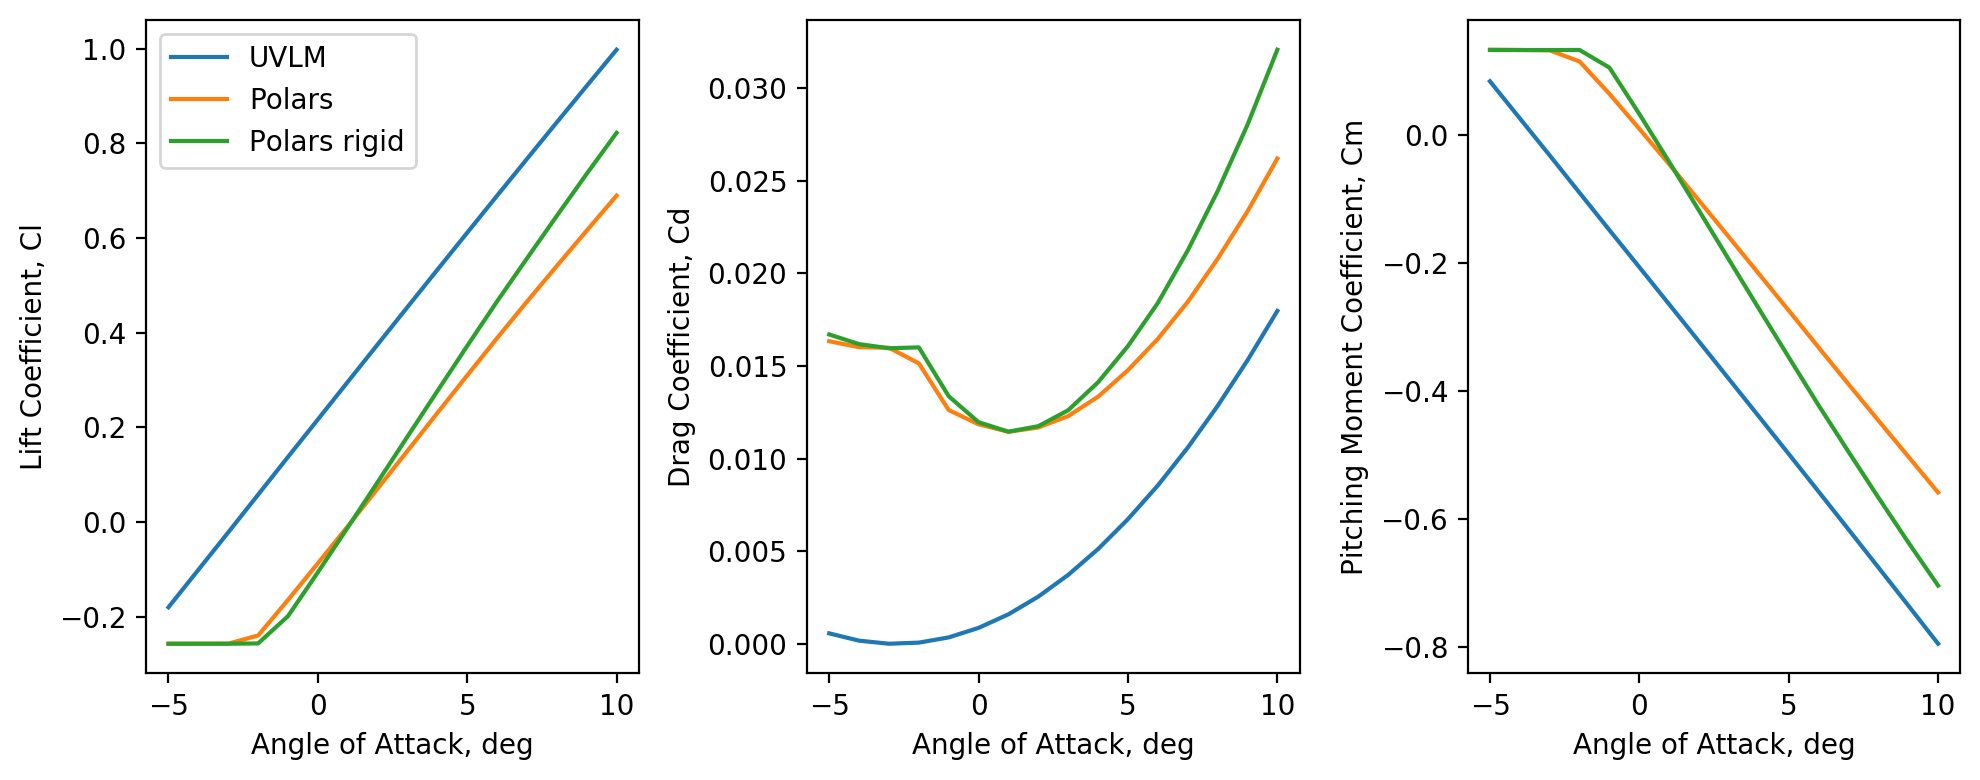

In [11]:
for ith, case in enumerate(cases):
    if ith == 0:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figsize=(10, 4), lsargs=case['lsargs'])
    else:
        fig, ax = plot_polar(*load_polar('./polar_output_data/' + case['filename']), figax=(fig, ax), lsargs=case['lsargs'])
        
ax[0].legend()

The flat out side on the lower angle of attack region is because the local, sectional angle of attack is exceeding the polar data minimum angle of attack, and the lift is being held constant